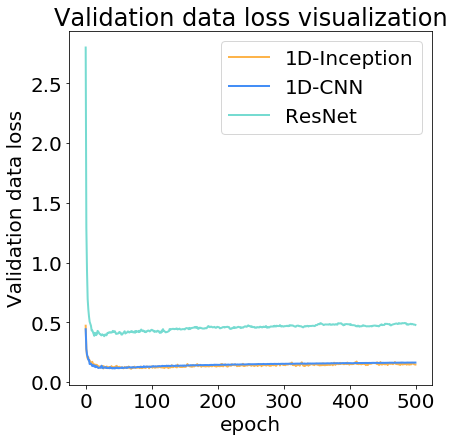

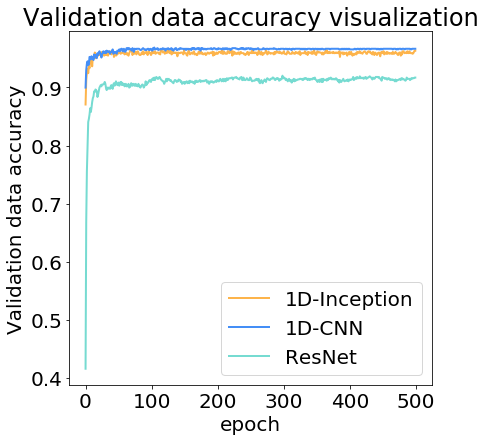

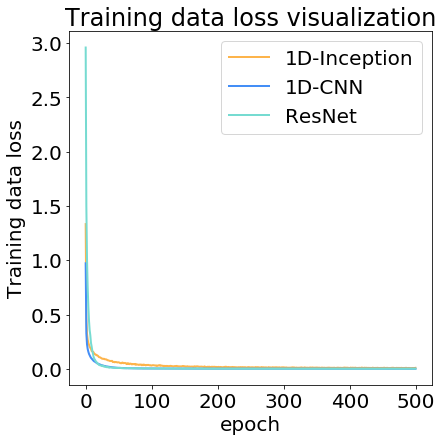

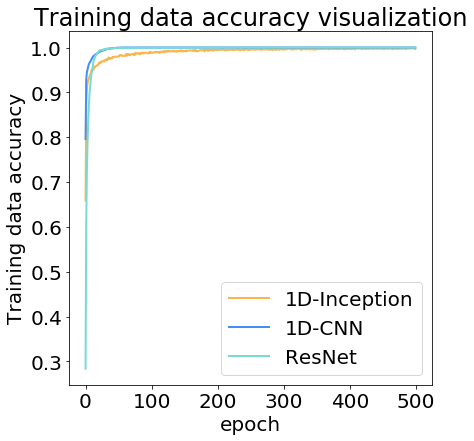

In [6]:
import numpy as np
import pandas as pd
from math import sqrt
import random
import copy
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os
import pickle

SCALE_FACTOR = 1.25

FIG_WIDTH_1COL = 5.2 * SCALE_FACTOR
FIG_WIDTH_2COL = 7.5 * SCALE_FACTOR
FIG_HEIGHT_MAX = 8.75 * SCALE_FACTOR

def savePickle(obj,output_name):
    f = open(output_name+".pickle", "wb+")
    pickle.dump(obj, f)
    f.close()
    
def loadPickle(output_name):
    f = open(output_name+".pickle", "rb")
    obj = pickle.load(f)
    f.close()
    return obj

tag = '_6'
res_history = loadPickle('resnet_history'+tag)
cnn1d_history = loadPickle('cnn1d_history'+tag)
inception_history = loadPickle('inception_history'+tag)

line_width = 2.0
title_mapping={'loss':'Training data loss visualization',
              'val_loss':'Validation data loss visualization',
              'acc':'Training data accuracy visualization',
              'val_acc':'Validation data accuracy visualization'}

label_mapping={'loss':'Training data loss',
              'val_loss':'Validation data loss',
              'acc':'Training data accuracy',
              'val_acc':'Validation data accuracy'}

for key in inception_history.history.keys():
    fig = plt.figure(figsize=(FIG_WIDTH_1COL, FIG_WIDTH_1COL))
    plt.rcParams.update({'font.size': 20})
    plt.plot(inception_history.history[key], color='#fdb44b', linewidth=line_width)
    plt.plot(cnn1d_history.history[key], color='#448ef6', linewidth=line_width)
    plt.plot(res_history.history[key], color='#76dbd1', linewidth=line_width)
    
  
    plt.title(title_mapping[key])
    plt.ylabel(label_mapping[key])
    if key in ['val_loss', 'loss']:
        #plt.ylim([0,1])
        legend_location = 'upper right'
        
    if key in ['val_acc', 'acc']:
        #plt.ylim([0,1])
        legend_location = 'lower right'
    plt.xlabel('epoch')
    plt.legend(['1D-Inception', '1D-CNN', 'ResNet'], loc=legend_location)
    
    

    plt.show()
    fig.tight_layout()
    fig.savefig(key+'Visualization.png',dpi=600)
    